In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
import seaborn as sns
import datetime
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

## model imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

##import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

/Users/melahattayli/micromamba/envs/insurance_prediction/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2>Predicting Car Insurance Purchases</h2>

<h3>Problem Statement</h3>

As a data scientist at a bank, your task is to predict whether potential customers will purchase car insurance. You have access to customer demographic information, details about the current and previous insurance sales campaigns, and historical data on 3100 customers who were contacted in the past.

<h3>Objective</h3>

Given data on 935 customers contacted in the current campaign, build a machine learning model to accurately predict their likelihood of purchasing car insurance.

<h3>Evaluation</h3>

Submissions will be evaluated based on the 100 * Accuracy Score, measuring the model's overall prediction accuracy.
# Car Insurance Prediction


<h2>About the Data</h2>

The training dataset contains 17 features (excluding target variable). Here are some key features and their descriptions:

<h3>Demographic Information:</h3>

age: Age of the customer

job_type: Occupation of the customer

marital_status: Marital status of the customer

education_level: Educational level of the customer

<h3>Financial Information:</h3>

default_or_not: Whether the customer has a history of defaulting on payments

balance_amt: The customer's bank account balance

<h3>Insurance Information:</h3>

household_insurance: Whether the customer has household insurance

car_loan: Whether the customer has a car loan

<h3>Campaign Information:</h3>

communication: Communication channel used (e.g., phone, email)

last_contact_day: Day of the last contact

last_contact_month: Month of the last contact

no_of_contacts: Number of times the customer was contacted

days_passed: Days elapsed since the last contact

prev_attempts: Number of previous contact attempts

outcome: Outcome of the last contact (e.g., success, failure)

<h3>Call Information:</h3>
call_start: Start time of the call

call_end: End time of the call

--The target variable, car_insurance, indicates whether the customer purchased car insurance (1) or not (0).


<h2>Exploratory Data Analysis</h2>

In [2]:
#Read the csv file to pandas dataframe
train = pd.read_csv("./data/Train_data.csv")
test = pd.read_csv("./data/Test_data.csv")

In [3]:
train.head(10)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,9,jul,1,-1,0,NaN,10:51:56,10:57:43,0
7,21.000000,student,single,primary,0,1596.000000,0,0,cellular,26,aug,1,93,2,failure,10:10:32,10:12:27,0
8,52.091704,admin.,married,secondary,0,101.453662,0,0,cellular,21,aug,3,-1,0,NaN,16:42:19,16:52:35,1
9,49.000000,technician,married,secondary,0,412.000000,0,0,cellular,19,aug,8,-1,0,NaN,15:33:44,15:55:17,1


In [4]:
train.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance
count,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,41.325847,0.014507,1543.067240,0.465184,0.114442,15.353965,2.356867,52.419084,0.792392,0.567376
std,11.517698,0.119587,3301.474598,0.498867,0.318399,8.164255,2.594238,109.231364,2.224740,0.495520
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,123.821352,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,589.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,0.000000,1696.000000,1.000000,0.000000,21.000000,3.000000,56.750000,1.000000,1.000000
max,92.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


####  A weird thing is 'day_passed' variable has negative values. Let's convert thes negative values to 0, as negative timeframe is not correct.

In [5]:
train['days_passed'] = train['days_passed'].apply(lambda x: 0 if x<0  else x)
print("The minimum value of the day_passed variable is:", train['days_passed'].min())

The minimum value of the day_passed variable is: 0


In [6]:
#check if the features parsed correctly
train.dtypes

age                    float64
job_type                object
marital_status          object
education_level         object
default_or_not           int64
balance_amt            float64
household_insurance      int64
car_loan                 int64
communication           object
last_contact_day         int64
last_contact_month      object
no_of_contacts           int64
days_passed              int64
prev_attempts            int64
Outcome                 object
call_start              object
call_end                object
car_insurance            int64
dtype: object

### Calculate the proportion of observations in the train data that had car insurance
### Find two naive train accuracies  by assumming that everyone has a car insurance or vice versa.

In [7]:
'''If everyone assumed to have car insurance train and test accuracy would be:'''
naive_train_acc_1 = (train['car_insurance'] == 1).sum()/len(train)
naive_train_acc_2 = (train['car_insurance'] == 0).sum()/len(train)
print(f"If everyone assumed to have car insurance: \n    train accuracy:{naive_train_acc_1}")
print(f"If everyone assumed to have no car insurance: \n    train accuracy:{naive_train_acc_2}")

If everyone assumed to have car insurance: 
    train accuracy:0.5673758865248227
If everyone assumed to have no car insurance: 
    train accuracy:0.4326241134751773


## Correct any data type inconsistencies in the dataset

### call_end and call_start columns are object data type even though they are time-related.
#### Lets convert them into nanoseconds (float data type)

In [8]:
train['call_end']

0       10:24:29
1       13:59:48
2       13:27:16
3       10:21:48
4       12:27:14
          ...   
3097    10:08:37
3098    16:06:50
3099    13:47:23
3100    14:03:50
3101    16:50:36
Name: call_end, Length: 3102, dtype: object

In [9]:
train['call_start']

0       10:22:20
1       09:06:30
2       13:18:41
3       10:09:18
4       12:12:30
          ...   
3097    10:08:24
3098    16:06:03
3099    13:42:56
3100    13:54:28
3101    16:37:35
Name: call_start, Length: 3102, dtype: object

In [10]:
call_end = pd.to_datetime(train['call_end'],  format='%H:%M:%S')
call_end

0      1900-01-01 10:24:29
1      1900-01-01 13:59:48
2      1900-01-01 13:27:16
3      1900-01-01 10:21:48
4      1900-01-01 12:27:14
               ...        
3097   1900-01-01 10:08:37
3098   1900-01-01 16:06:50
3099   1900-01-01 13:47:23
3100   1900-01-01 14:03:50
3101   1900-01-01 16:50:36
Name: call_end, Length: 3102, dtype: datetime64[ns]

In [11]:
call_start = pd.to_datetime(train['call_start'],  format='%H:%M:%S')
call_start

0      1900-01-01 10:22:20
1      1900-01-01 09:06:30
2      1900-01-01 13:18:41
3      1900-01-01 10:09:18
4      1900-01-01 12:12:30
               ...        
3097   1900-01-01 10:08:24
3098   1900-01-01 16:06:03
3099   1900-01-01 13:42:56
3100   1900-01-01 13:54:28
3101   1900-01-01 16:37:35
Name: call_start, Length: 3102, dtype: datetime64[ns]

In [12]:
t = datetime.datetime(1900, 1, 1, 0, 0) # to_datetime function automatically adds this date to features (call_end and call_start)
t

datetime.datetime(1900, 1, 1, 0, 0)

In [13]:
call_end_timedelta = call_end - t
call_end_timedelta

0      0 days 10:24:29
1      0 days 13:59:48
2      0 days 13:27:16
3      0 days 10:21:48
4      0 days 12:27:14
             ...      
3097   0 days 10:08:37
3098   0 days 16:06:50
3099   0 days 13:47:23
3100   0 days 14:03:50
3101   0 days 16:50:36
Name: call_end, Length: 3102, dtype: timedelta64[ns]

In [14]:
call_end_total_seconds = call_end_timedelta.apply(lambda x:x.total_seconds())
call_end_total_seconds

0       37469.0
1       50388.0
2       48436.0
3       37308.0
4       44834.0
         ...   
3097    36517.0
3098    58010.0
3099    49643.0
3100    50630.0
3101    60636.0
Name: call_end, Length: 3102, dtype: float64

In [15]:
#change call_end to total_seconds in train data set
train['call_end'] = call_end_total_seconds

train['call_end']

0       37469.0
1       50388.0
2       48436.0
3       37308.0
4       44834.0
         ...   
3097    36517.0
3098    58010.0
3099    49643.0
3100    50630.0
3101    60636.0
Name: call_end, Length: 3102, dtype: float64

In [16]:
call_start_timedelta = call_start - t
call_start_timedelta

0      0 days 10:22:20
1      0 days 09:06:30
2      0 days 13:18:41
3      0 days 10:09:18
4      0 days 12:12:30
             ...      
3097   0 days 10:08:24
3098   0 days 16:06:03
3099   0 days 13:42:56
3100   0 days 13:54:28
3101   0 days 16:37:35
Name: call_start, Length: 3102, dtype: timedelta64[ns]

In [17]:
call_start_total_seconds = call_start_timedelta.apply(lambda x:x.total_seconds())
call_start_total_seconds

0       37340.0
1       32790.0
2       47921.0
3       36558.0
4       43950.0
         ...   
3097    36504.0
3098    57963.0
3099    49376.0
3100    50068.0
3101    59855.0
Name: call_start, Length: 3102, dtype: float64

In [18]:
#change call_start to total_seconds in train data set
train['call_start'] = call_start_total_seconds

train['call_start']

0       37340.0
1       32790.0
2       47921.0
3       36558.0
4       43950.0
         ...   
3097    36504.0
3098    57963.0
3099    49376.0
3100    50068.0
3101    59855.0
Name: call_start, Length: 3102, dtype: float64

### Create a new feature call_duration

In [19]:
train['call_duration'] = train['call_end'] - train['call_start']
train['call_duration']

0         129.0
1       17598.0
2         515.0
3         750.0
4         884.0
         ...   
3097       13.0
3098       47.0
3099      267.0
3100      562.0
3101      781.0
Name: call_duration, Length: 3102, dtype: float64

### Now all features should be in correct data type!!! Check the datatypes again to makesure!

In [20]:
train.dtypes

age                    float64
job_type                object
marital_status          object
education_level         object
default_or_not           int64
balance_amt            float64
household_insurance      int64
car_loan                 int64
communication           object
last_contact_day         int64
last_contact_month      object
no_of_contacts           int64
days_passed              int64
prev_attempts            int64
Outcome                 object
call_start             float64
call_end               float64
car_insurance            int64
call_duration          float64
dtype: object

### Check for the null values

In [21]:
train.isnull().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
call_duration             0
dtype: int64

### So, there are some null values in the data. Especially in the "Outcome variable". First, we need to get familiar with the data and then decide how to impute them!!!


In [22]:
all_features = list(train.columns)
all_features

['age',
 'job_type',
 'marital_status',
 'education_level',
 'default_or_not',
 'balance_amt',
 'household_insurance',
 'car_loan',
 'communication',
 'last_contact_day',
 'last_contact_month',
 'no_of_contacts',
 'days_passed',
 'prev_attempts',
 'Outcome',
 'call_start',
 'call_end',
 'car_insurance',
 'call_duration']

In [23]:
#check for unique values in train
for feature in all_features:
    print(f"number of unique values for {feature}:{train[feature].nunique()}")

number of unique values for age:580
number of unique values for job_type:11
number of unique values for marital_status:3
number of unique values for education_level:3
number of unique values for default_or_not:2
number of unique values for balance_amt:2004
number of unique values for household_insurance:2
number of unique values for car_loan:2
number of unique values for communication:2
number of unique values for last_contact_day:31
number of unique values for last_contact_month:12
number of unique values for no_of_contacts:29
number of unique values for days_passed:320
number of unique values for prev_attempts:22
number of unique values for Outcome:3
number of unique values for call_start:2309
number of unique values for call_end:2321
number of unique values for car_insurance:2
number of unique values for call_duration:1240


### Some of the features are categorical, while others are continuous. Let's classify the features and visualise them.

In [24]:
cat_variables = ['job_type', 'marital_status', 'education_level', 'default_or_not','household_insurance','car_loan','communication','last_contact_day', 'last_contact_month','Outcome']
num_variables = ['age', 'balance_amt', 'no_of_contacts', 'days_passed', 'prev_attempts','call_start', 'call_end', 'call_duration']


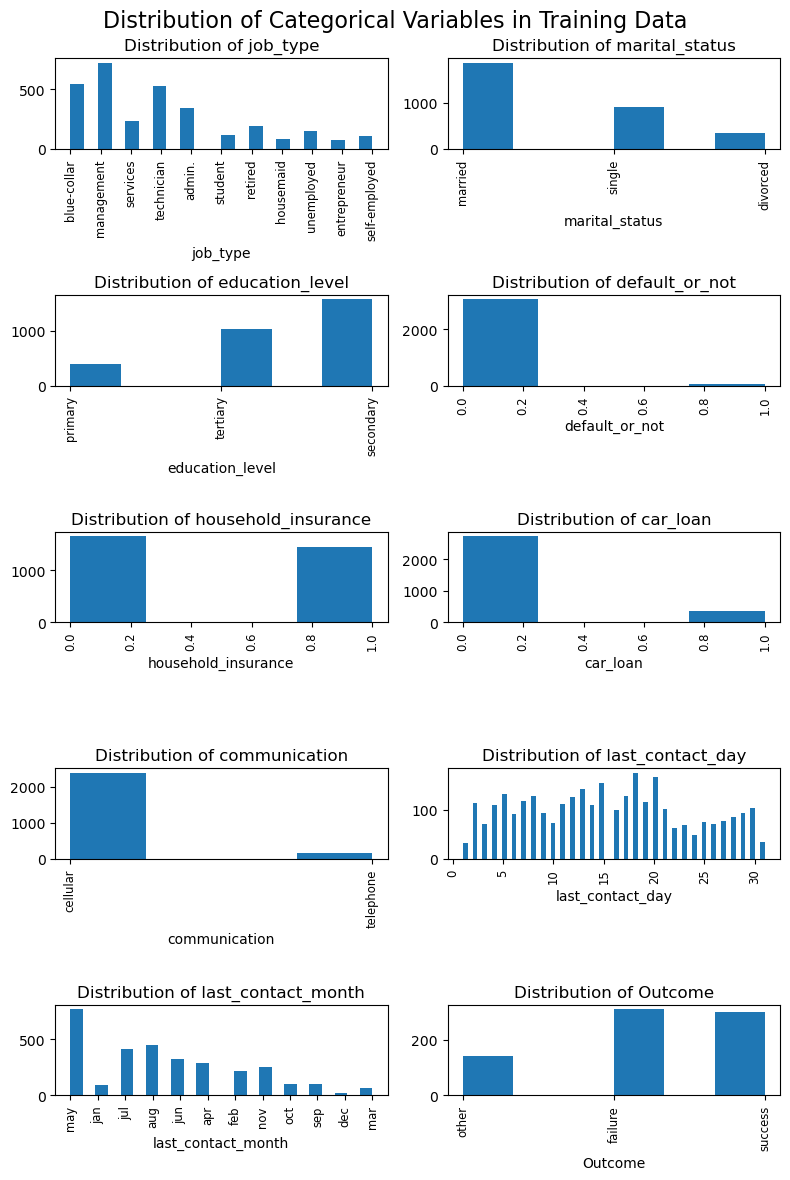

In [25]:
#plot histogram of categorical variables in train dataset

# adding multiple Axes objects  
fig, ax = plt.subplots(len(cat_variables)//2, 2, tight_layout=True, figsize=(8,12))
fig.suptitle('Distribution of Categorical Variables in Training Data', fontsize=16)
plt.subplots_adjust(left=0.125, bottom=0.125, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

ax = ax.flatten()
for i,variable in enumerate(cat_variables):
    ax[i].hist(train[variable][train[variable].notnull()].values, density=False, bins=train[variable][train[variable].notnull()].nunique()*2)
    ax[i].set_title(f'Distribution of {variable}')
    ax[i].set_xlabel(variable)
    ax[i].tick_params(axis='x', labelrotation=90, labelsize='small')


    

### Lets also see the relationship of features with target variable (car_insurance)

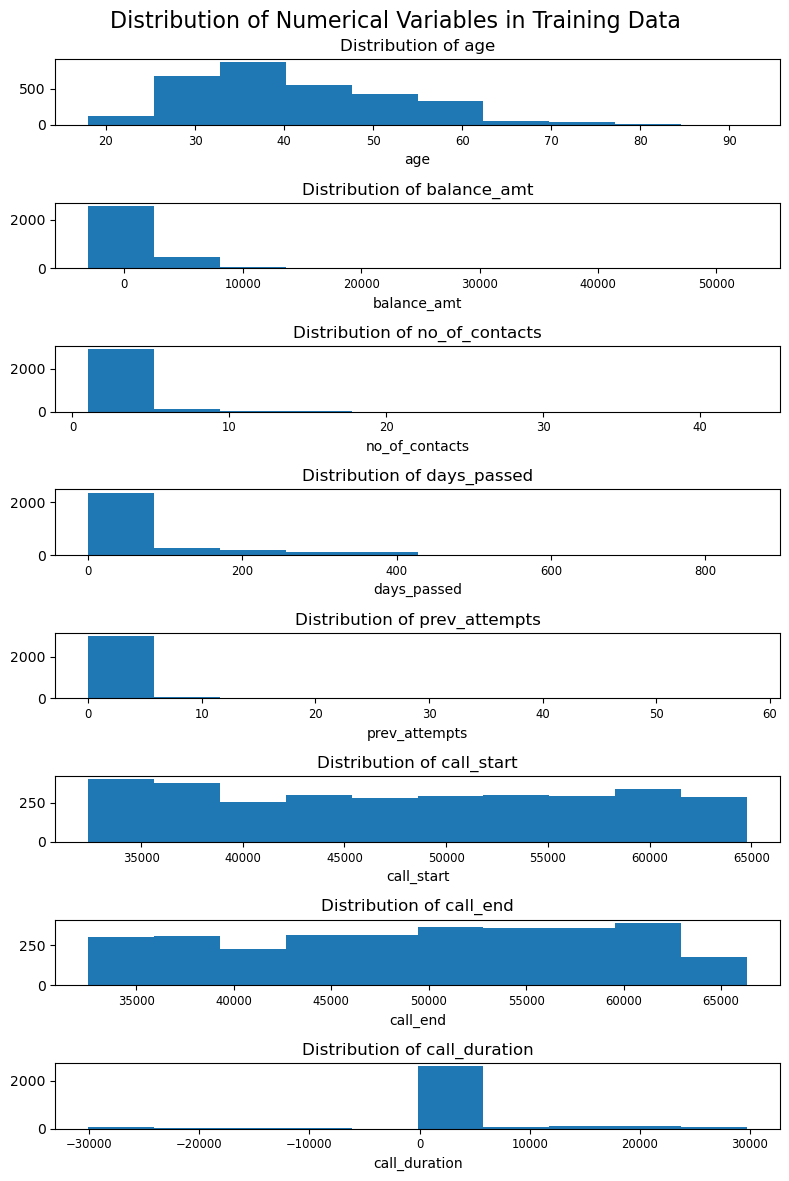

In [26]:
#Visualise relationship of categorical features with car_insurance

# adding multiple Axes objects  
fig, ax = plt.subplots(len(num_variables), 1, tight_layout=True, figsize=(8,12))
fig.suptitle('Distribution of Numerical Variables in Training Data', fontsize=16)
plt.subplots_adjust(left=0.125, bottom=0.125, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

ax = ax.flatten()
for i,variable in enumerate(num_variables):
    ax[i].hist(train[variable][train[variable].notnull()].values, density=False, bins=10)
    ax[i].set_title(f'Distribution of {variable}')
    ax[i].set_xlabel(variable)
    ax[i].tick_params(axis='x', labelrotation=0, labelsize='small')


### It looks like call duration has some negative values which does not make any sense. This means some of the values either in call_start or call_end is wrong. Lets see in which instances call_start has bigger values than call_end

In [27]:
train[train["call_duration"]< 0]

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance,call_duration
13,40.291210,admin.,married,secondary,0,86.071939,0,0,cellular,20,jul,1,0,0,NaN,62307.0,39370.0,1,-22937.0
29,26.507929,management,single,secondary,0,146.539647,1,0,cellular,15,may,1,0,0,NaN,54149.0,39144.0,1,-15005.0
53,48.041465,management,single,secondary,0,334.181655,1,0,cellular,27,sep,2,92,11,NaN,62030.0,48638.0,1,-13392.0
54,35.497888,management,married,tertiary,0,3417.279696,1,0,cellular,19,apr,1,0,0,NaN,46722.0,35306.0,1,-11416.0
69,35.648563,management,married,secondary,0,868.496684,1,0,cellular,2,jun,3,0,0,NaN,60492.0,33220.0,1,-27272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,58.133899,management,married,tertiary,0,7093.996889,1,0,cellular,15,aug,1,0,0,NaN,54929.0,36057.0,1,-18872.0
3034,51.127613,technician,married,secondary,0,478.608980,1,0,cellular,17,aug,1,0,0,NaN,56024.0,36053.0,1,-19971.0
3061,51.231266,management,married,tertiary,0,3140.728038,0,0,cellular,7,may,1,35,0,NaN,58813.0,33297.0,1,-25516.0
3065,39.000000,technician,married,secondary,0,2828.349737,0,0,cellular,8,dec,2,0,0,NaN,47667.0,34040.0,1,-13627.0


### So, there are 126 instances which has incorrect call_start and/or call_end values!!!

### Lets also see if there is a relationship between the features and the target variable (car_insurance)

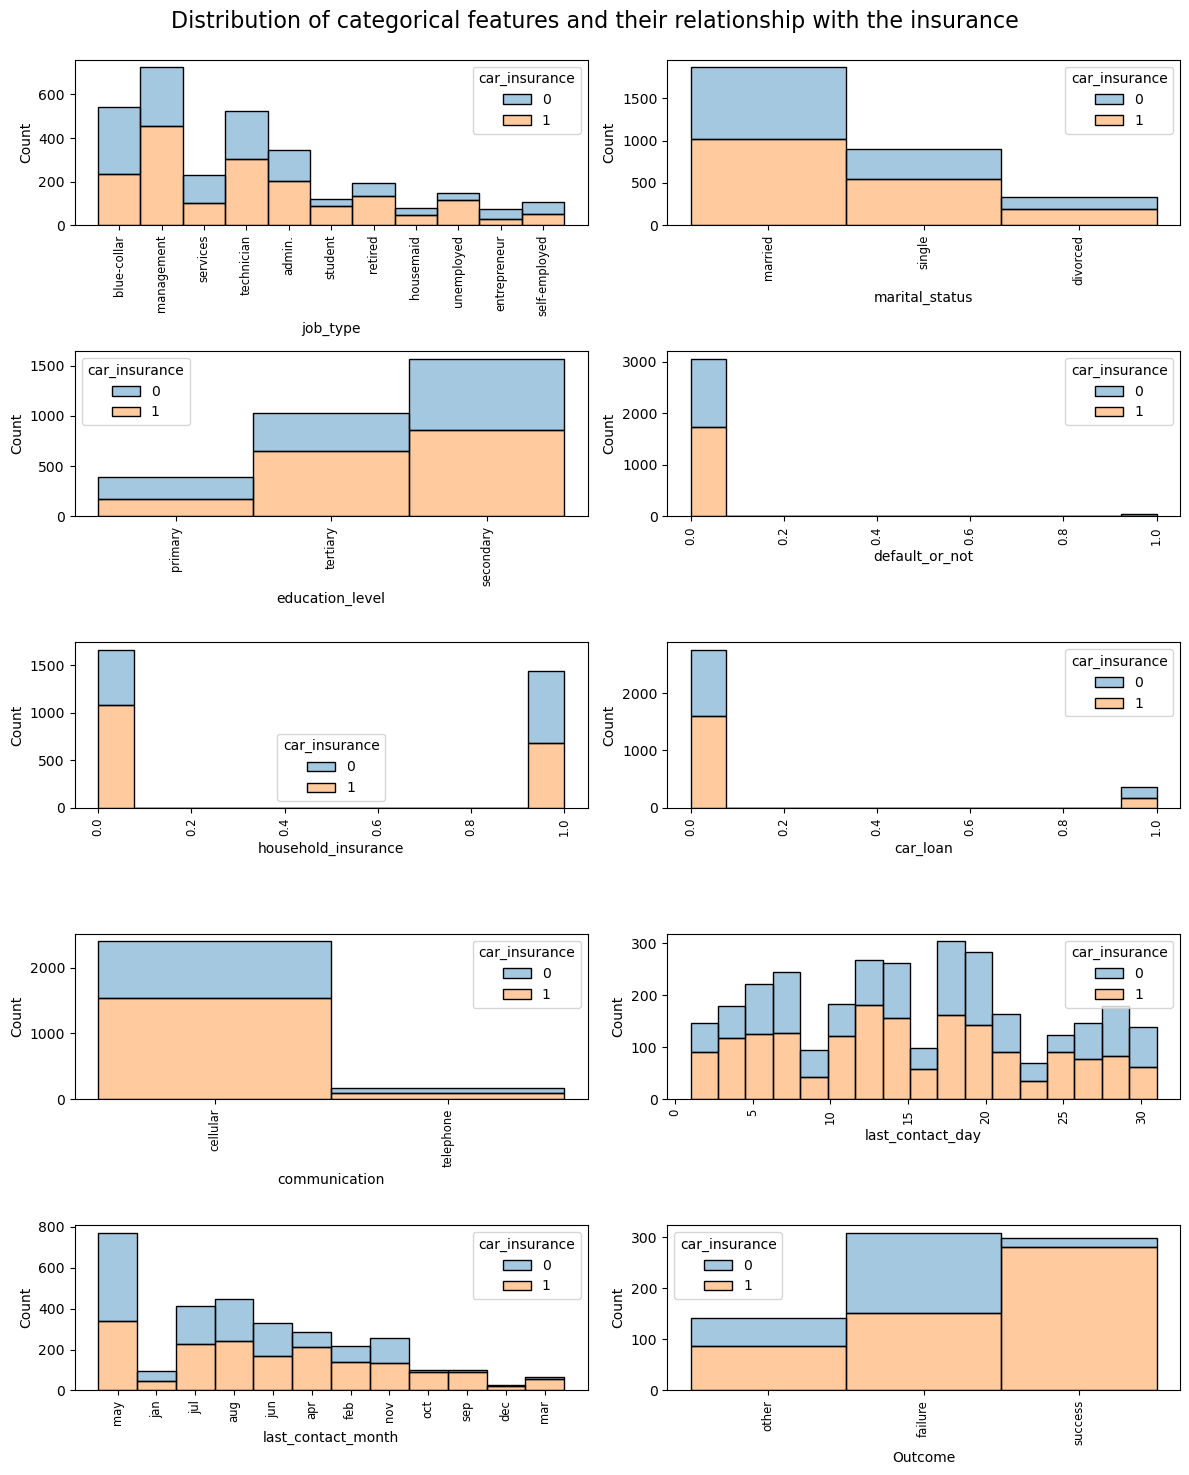

In [28]:
#Visualise relationship of categorical features with car_insurance
fig, ax = plt.subplots(5, 2,figsize=(12, 15))
ax = ax.ravel()

for i in range(len(cat_variables)):
    sns.histplot(data=train, x=cat_variables[i], hue='car_insurance', alpha=0.4, ax=ax[i], multiple="stack")
    ax[i].set_xlabel(cat_variables[i])
    #ax[i].set_ylabel(f'Distribution of {cat_variables[i]}')
    ax[i].tick_params(axis='x', labelrotation=90, labelsize='small')
fig.suptitle('Distribution of categorical features and their relationship with the insurance\n', fontsize=16)
fig.tight_layout()  

#### Lets see if there is a realtionship with target values and missing values

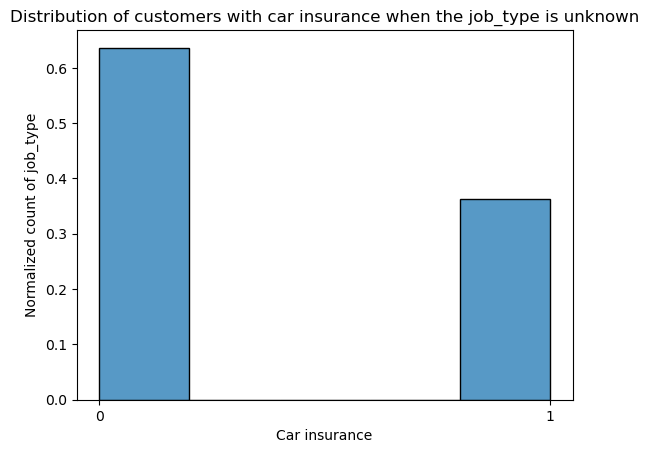

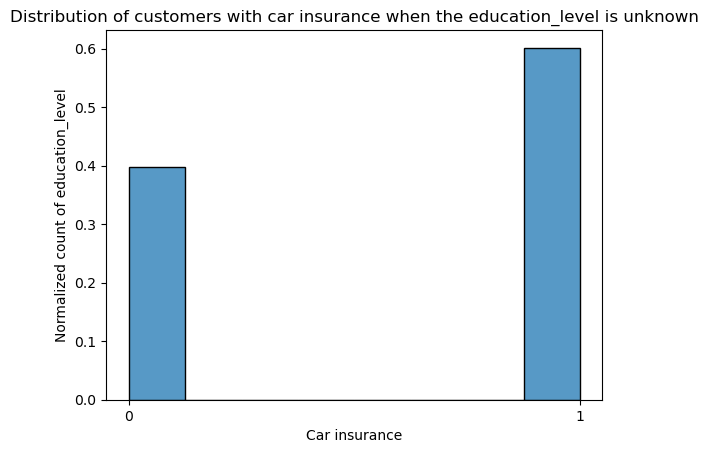

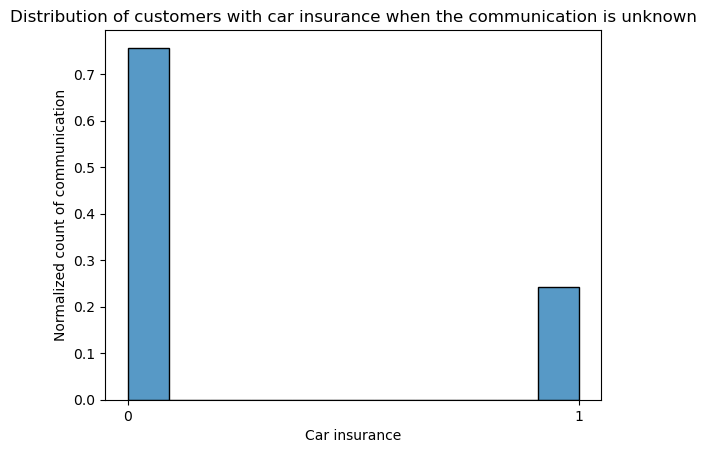

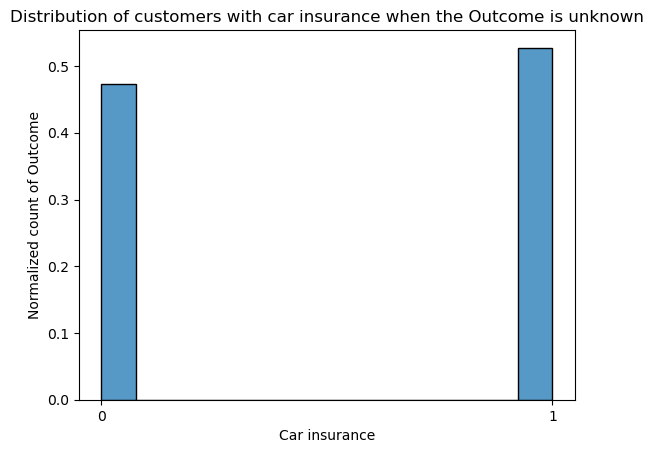

In [29]:
features_with_none =["job_type",  "education_level", "communication", "Outcome"]
for feature in features_with_none:
    sns.histplot(data=train, x=train["car_insurance"][train[feature].isnull()], stat="probability")
    plt.xticks([0,1], ['0','1'])
    plt.xlabel("Car insurance")
    plt.ylabel(f"Normalized count of {feature}")
    plt.title(f"Distribution of customers with car insurance when the {feature} is unknown")
    plt.show()

**Based on the provided graph, we can make informed decisions about how to impute missing values in the categorical variables. The visualization reveals valuable insights into the data distribution and relationships between variables, aiding in the selection of appropriate imputation strategies.**

In [30]:
impute_values = {"job_type": 'entrepreneur', "education_level": 'secondary', "communication": 'telephone', "Outcome": 'other'}
train.fillna(value=impute_values, inplace=True)

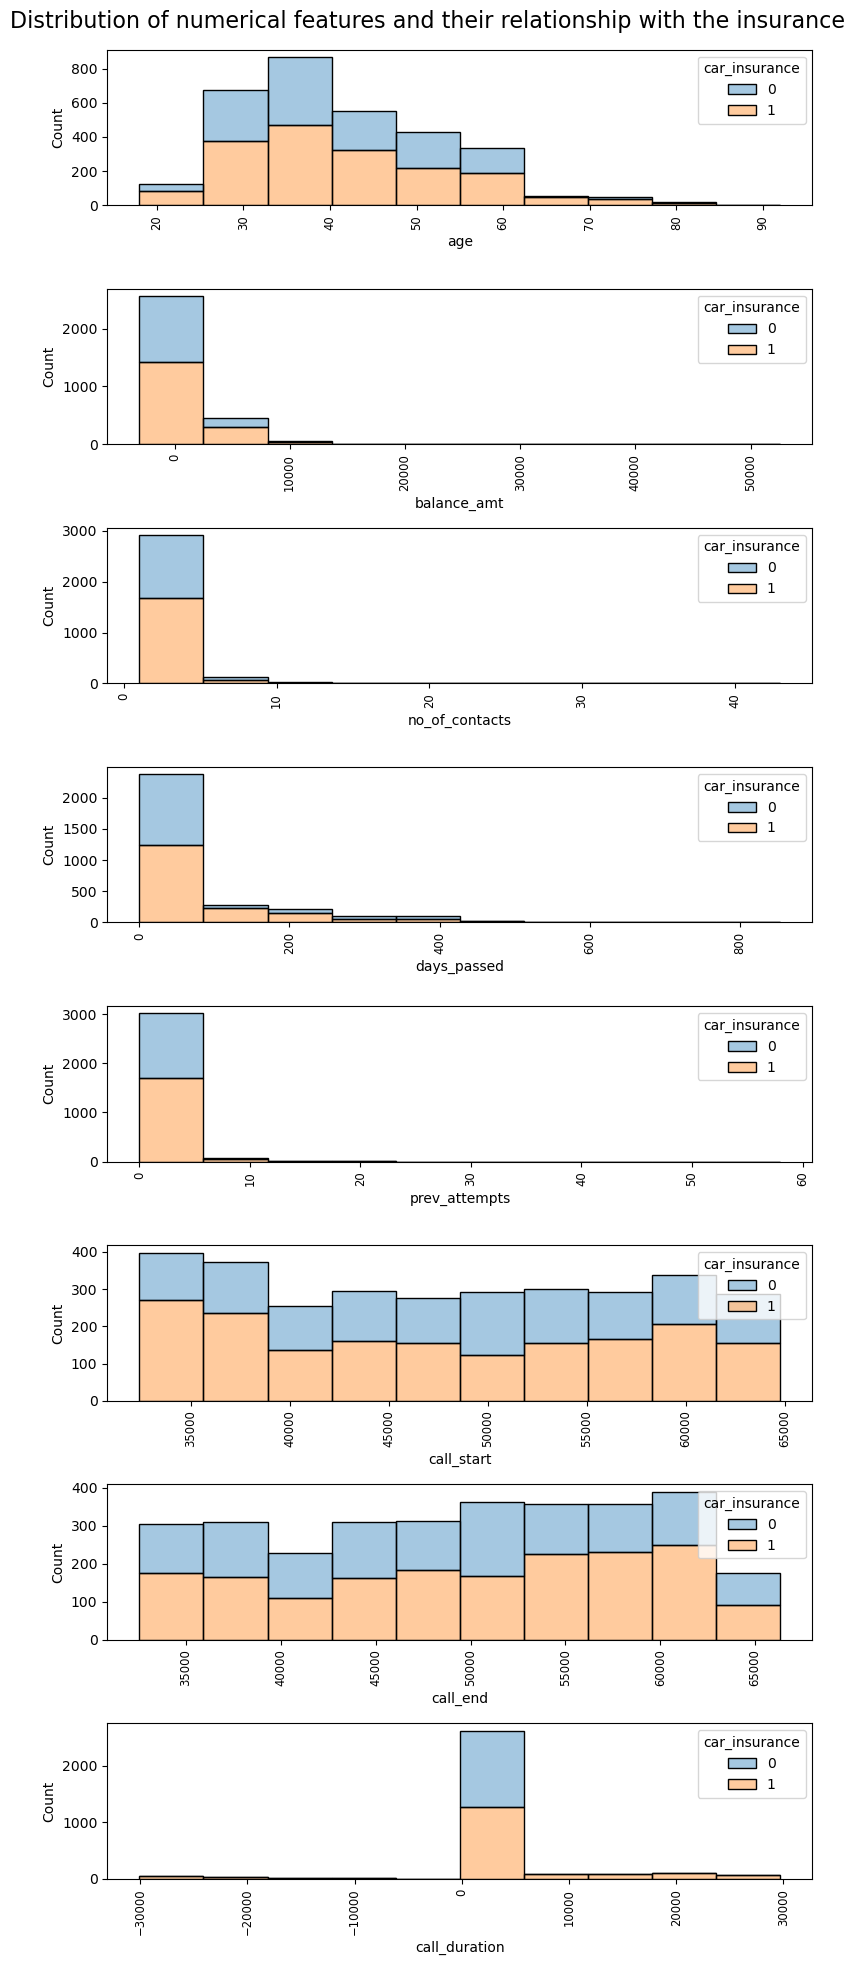

In [31]:
#Visualise relationship of numerical features with car_insurance
fig, ax = plt.subplots(len(num_variables), 1,figsize=(8, 20))
ax = ax.ravel()

for i in range(len(num_variables)):
    sns.histplot(data=train, x=num_variables[i], hue='car_insurance', alpha=0.4, ax=ax[i], multiple="stack", bins=10)
    ax[i].set_xlabel(num_variables[i])
    #ax[i].set_ylabel(f'Distribution of {num_variables[i]}')
    ax[i].tick_params(axis='x', labelrotation=90, labelsize='small')
fig.suptitle('Distribution of numerical features and their relationship with the insurance\n', fontsize=16)
fig.tight_layout() 

### So far, we saw the distribution of the features based on the target. But I am also curious how the statistical values (median, 25% quartiles etc) of features are with respect to target. So, lets visualize them by boxplots.

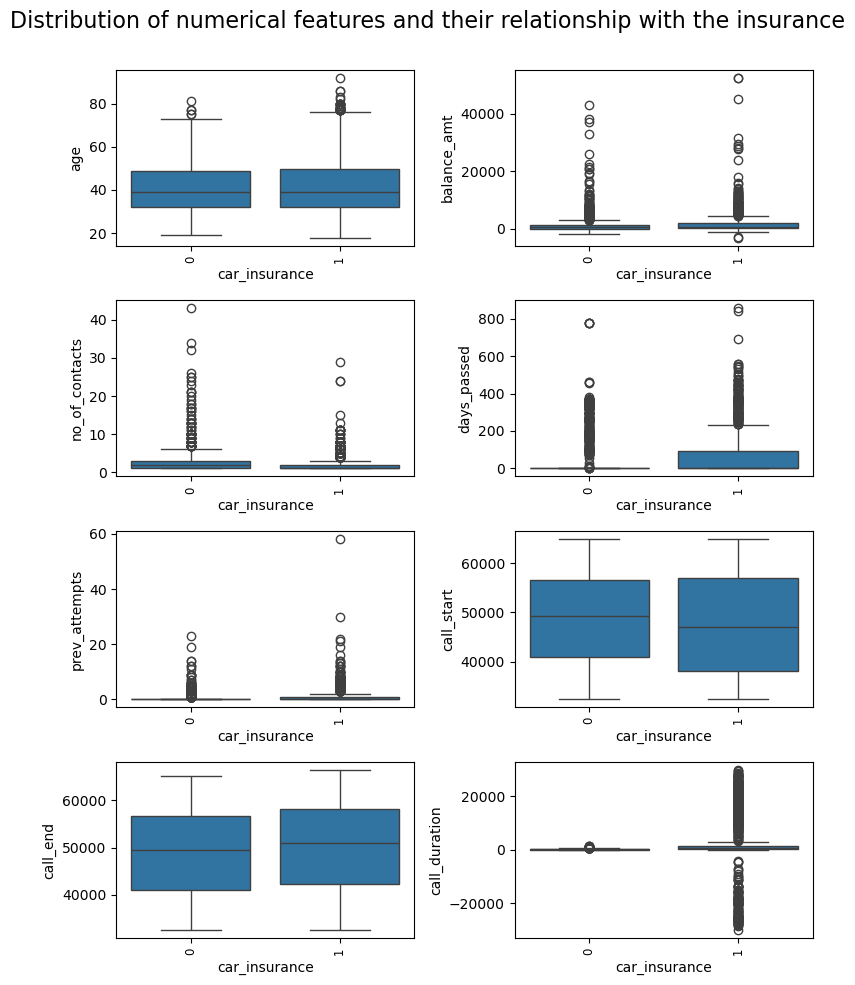

In [32]:
fig, ax = plt.subplots(len(num_variables)//2, 2,figsize=(8, 10))
ax = ax.ravel()

for i in range(len(num_variables)):
    sns.boxplot(data=train, x='car_insurance', y=num_variables[i], ax=ax[i])
    ax[i].set_xlabel('car_insurance')
    ax[i].set_ylabel(num_variables[i])
    ax[i].tick_params(axis='x', labelrotation=90, labelsize='small')
fig.suptitle('Distribution of numerical features and their relationship with the insurance\n', fontsize=16)
fig.tight_layout() 

### Lets get the median values for the numerical variables both car insured and not insured data points

In [33]:
 k = ['age',
 'balance_amt',
 'no_of_contacts',
 'days_passed',
 'prev_attempts',
 'call_start',
 'call_end',
 'call_duration', 'car_insurance']

In [34]:
train[k].groupby('car_insurance').median()

,age,balance_amt,no_of_contacts,days_passed,prev_attempts,call_start,call_end,call_duration
car_insurance,,,,,,,,
0,39.000000,458.500000,2.0,0.0,0.0,49346.0,49556.0,153.0
1,39.212367,691.415718,1.0,0.0,0.0,47142.0,51009.5,558.5


**From the values we can clearly see, people who has car insurance has higher balance in their bank account. Also, call duration is so much longer for people who bought car insurance.**

## Change object and datetime datatypes to dummy variables for further processing and correlations

In [35]:
make_dummy= ['job_type', 'marital_status', 'education_level','communication', 'last_contact_month','Outcome']
train = pd.concat([train, pd.get_dummies(train[make_dummy], drop_first=True, dtype=int)], axis=1).drop(make_dummy, axis=1)

In [36]:
train.columns

Index(['age', 'default_or_not', 'balance_amt', 'household_insurance',
       'car_loan', 'last_contact_day', 'no_of_contacts', 'days_passed',
       'prev_attempts', 'call_start', 'call_end', 'car_insurance',
       'call_duration', 'job_type_blue-collar', 'job_type_entrepreneur',
       'job_type_housemaid', 'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'marital_status_married',
       'marital_status_single', 'education_level_secondary',
       'education_level_tertiary', 'communication_telephone',
       'last_contact_month_aug', 'last_contact_month_dec',
       'last_contact_month_feb', 'last_contact_month_jan',
       'last_contact_month_jul', 'last_contact_month_jun',
       'last_contact_month_mar', 'last_contact_month_may',
       'last_contact_month_nov', 'last_contact_month_oct',
       'last_contact_month_sep', 'Outcome_other', 'Outcome_success'],
     

## Now lets plot the correlation graphs

Text(0.5, 1.0, 'the most correlated 10 features with the target car_insurance')

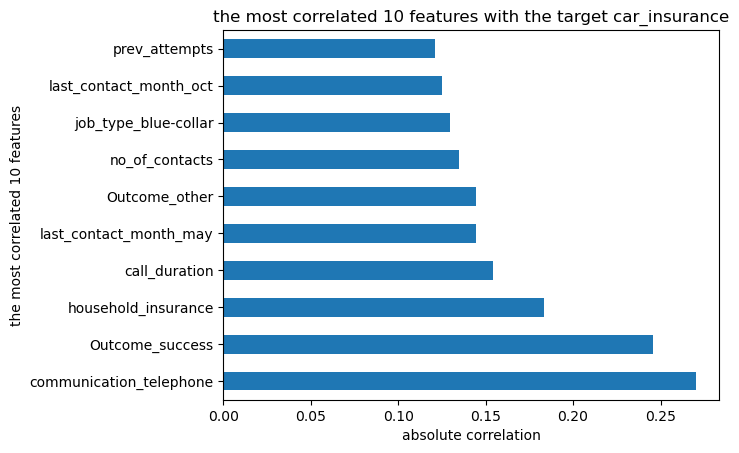

In [37]:
# see the correlation of the features with target variable car_insurance
abs(train.corr()['car_insurance']).sort_values(ascending=False).iloc[lambda x: x.index!='car_insurance'][:10].plot.barh()
plt.xlabel('absolute correlation')
plt.ylabel('the most correlated 10 features')
plt.title("the most correlated 10 features with the target car_insurance")


### Lets visualize data in 2 dimensions to see if data is separable

In [38]:
### First, standardize the data for dimensionality reduction 
x_train = train.drop('car_insurance', axis=1)
y_train = train['car_insurance']

#standardize
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)


#### Dimensionality Reduction with PCA

In [39]:
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_transformed_pca = pca.transform(x_train_std)

/Users/melahattayli/micromamba/envs/insurance_prediction/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [40]:
x_train_transformed_pca

array([[-68581.90924554,  -7948.01497942],
       [-68581.49997622,  -7945.29734409],
       [-68580.31611582,  -7947.79690278],
       ...,
       [-68580.11595413,  -7947.81496023],
       [-68579.99504194,  -7947.75748316],
       [-68578.52776867,  -7947.57729092]])

In [41]:
df = pd.DataFrame({'pca_1':x_train_transformed_pca[:,0], 'pca_2':x_train_transformed_pca[:,1], 'target':train['car_insurance']})
df.head(5)

,pca_1,pca_2,target
0,-68581.909246,-7948.014979,0
1,-68581.499976,-7945.297344,1
2,-68580.316116,-7947.796903,1
3,-68581.987937,-7947.927946,1
4,-68580.882801,-7947.796209,1


Text(0, 0.5, 'pca component 2')

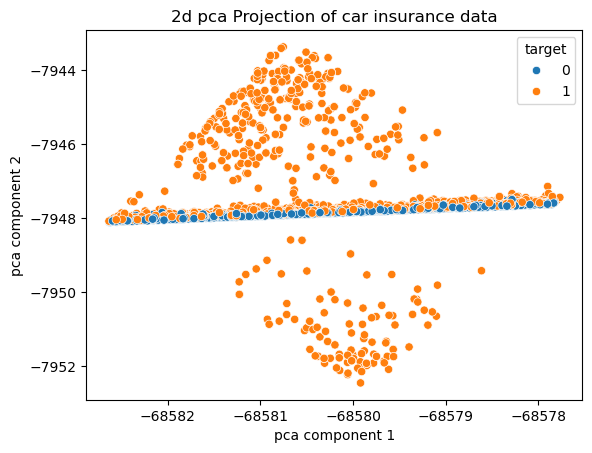

In [42]:
# visualize it
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='target')
plt.title("2d pca Projection of car insurance data")
plt.xlabel("pca component 1")
plt.ylabel("pca component 2")

#### Dimensionality Reduction with t-SNE

In [43]:
tsne = TSNE(n_components=2)
x_train_transformed_tsne = tsne.fit_transform(x_train_std)

In [44]:
df['tsne_1'] = x_train_transformed_tsne[:,0]
df['tsne_2'] = x_train_transformed_tsne[:,1]

Text(0, 0.5, 'tsne component 2')

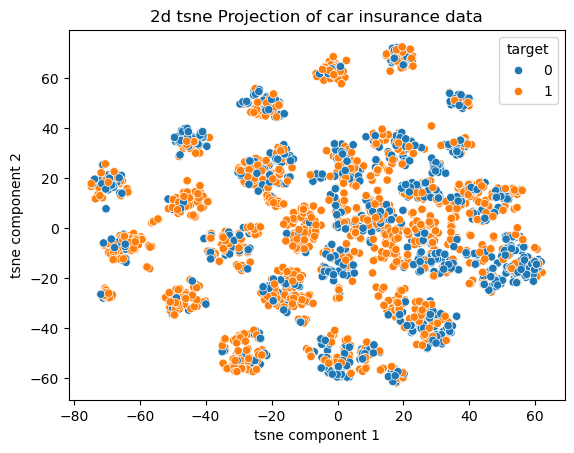

In [45]:
# visualize it
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='target')
plt.title("2d tsne Projection of car insurance data")
plt.xlabel("tsne component 1")
plt.ylabel("tsne component 2")

#### Lets continue experimenting with pca by using differen perplexity

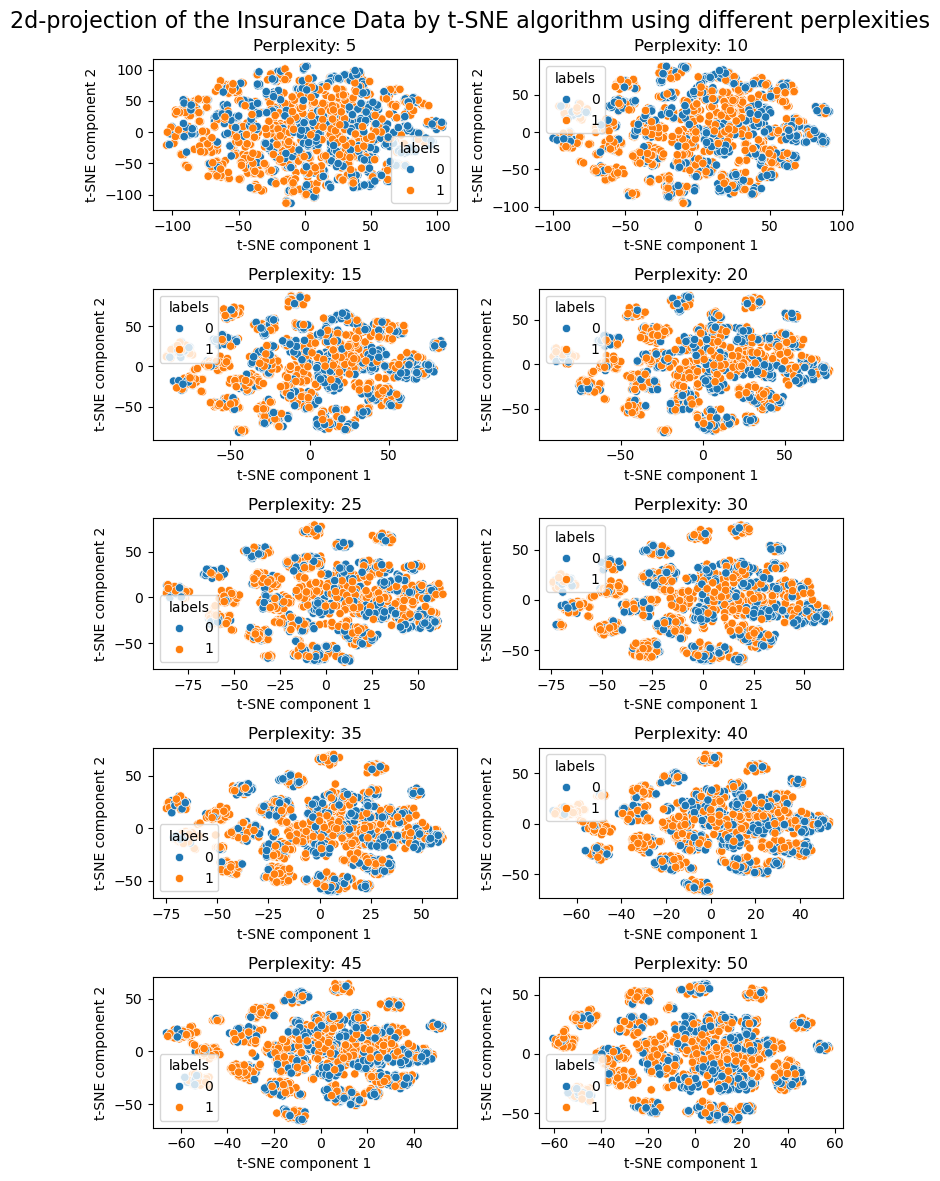

In [46]:
perplexities = np.arange(5,55, 5)

# adding multiple Axes objects  
fig, ax = plt.subplots(5, 2, tight_layout=True, figsize=(8,12))
fig.suptitle('2d-projection of the Insurance Data by t-SNE algorithm using different perplexities', fontsize=16)
plt.subplots_adjust(left=0.125, bottom=0.125, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

ax = ax.flatten()
for i,perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=1)
    insurance_tsne = tsne.fit_transform(x_train_std)
    df_tsne = pd.DataFrame(data=insurance_tsne, columns=['tsne1', 'tsne2'])
    df_tsne['labels'] = train['car_insurance']
    sns.scatterplot(data=df_tsne, x='tsne1', y='tsne2', hue='labels', ax=ax[i])
    ax[i].set_xlabel("t-SNE component 1")
    ax[i].set_ylabel("t-SNE component 2")
    ax[i].set_title(f'Perplexity: {perplexity}')

#### Dimensionality Reduction with MDS

In [47]:
mds = MDS(n_components=2, random_state=1)
x_train_transformed_mds = mds.fit_transform(x_train_std)

Text(0, 0.5, 'mds component 2')

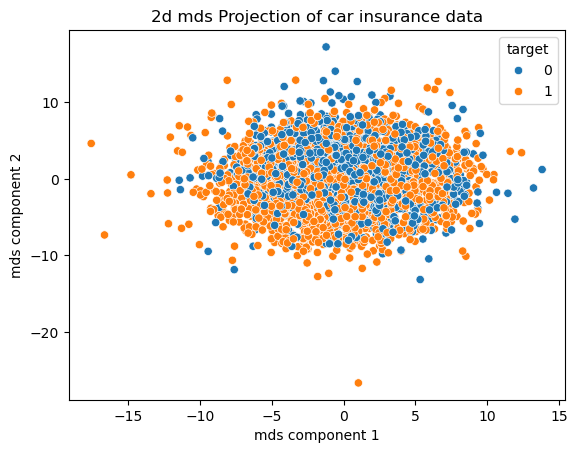

In [48]:
df['mds_1'] = x_train_transformed_mds[:,0]
df['mds_2'] = x_train_transformed_mds[:,1]
sns.scatterplot(data=df, x='mds_1', y='mds_2', hue='target')
plt.title("2d mds Projection of car insurance data")
plt.xlabel("mds component 1")
plt.ylabel("mds component 2")

### Dimensionality Reduction with UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


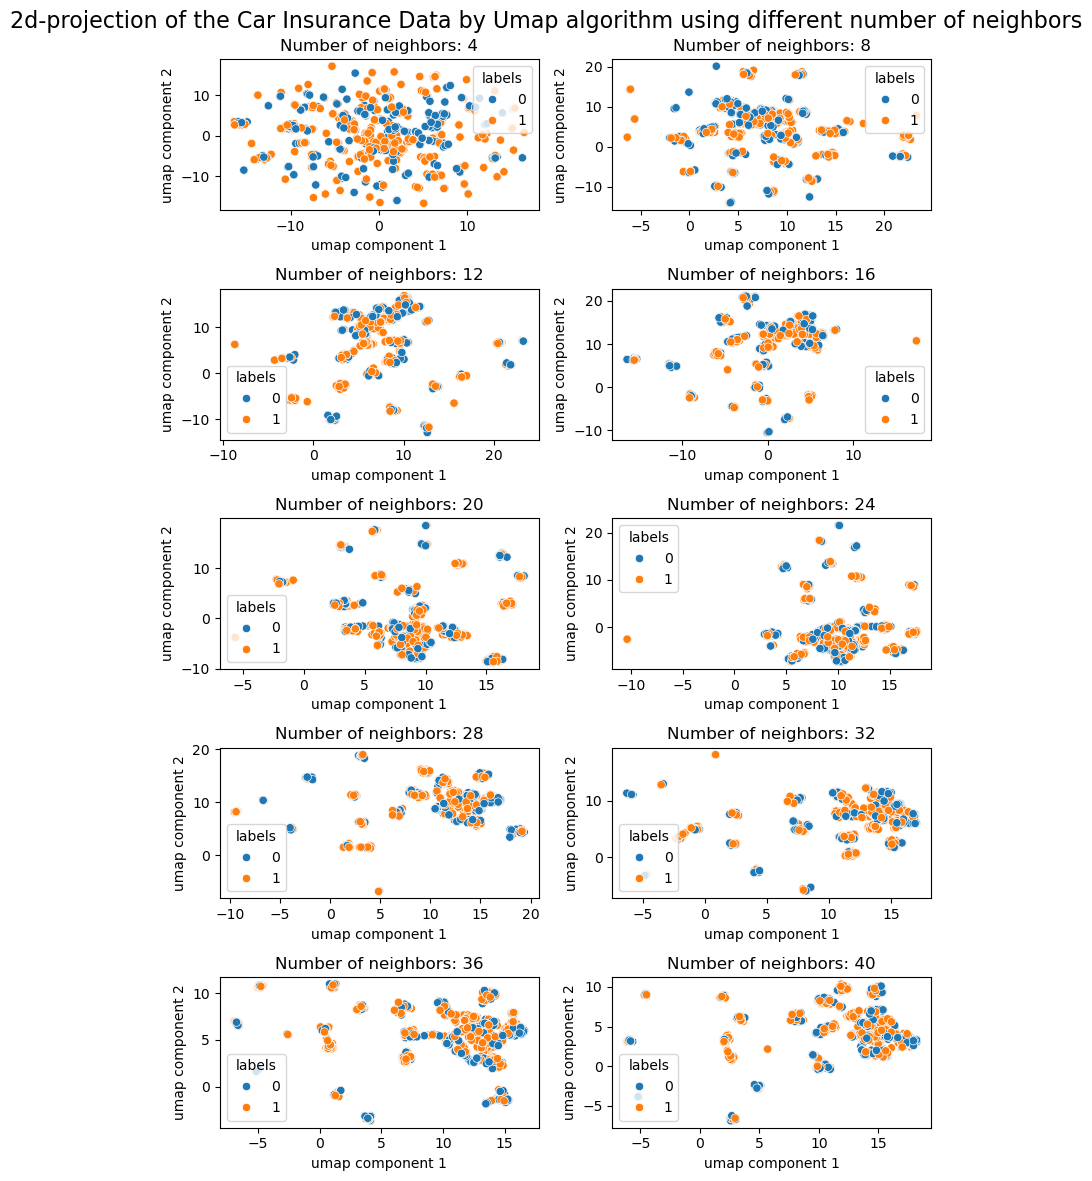

In [49]:
n_neighbors = np.arange(4,42, 4)

# adding multiple Axes objects  
fig, ax = plt.subplots(5, 2, tight_layout=True, figsize=(8,12))
fig.suptitle('2d-projection of the Car Insurance Data by Umap algorithm using different number of neighbors', fontsize=16)
plt.subplots_adjust(left=0.125, bottom=0.125, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

ax = ax.flatten()
for i, neighbor in enumerate(n_neighbors):
    umap_ = umap.UMAP(n_components=2, n_neighbors=neighbor)
    x_train_umap = umap_.fit_transform(x_train_std)
    df_umap = pd.DataFrame(data=x_train_umap, columns=['umap1', 'umap2'])
    df_umap['labels'] = train['car_insurance']
    sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='labels', ax=ax[i])
    ax[i].set_xlabel("umap component 1")
    ax[i].set_ylabel("umap component 2")
    ax[i].set_title(f'Number of neighbors: {neighbor}')

### Our 2d visualisations shows us data is not easily separable to 2 groups. But lets apply our models and decide!!

## Create a function called to process the as it was done in EDA steps

In [50]:
def process_df(df):

    #Fill the missing values of job_type, education_level, communication and Outcome as decided during EDA.
    impute_values = {"job_type": 'entrepreneur', "education_level": 'secondary', "communication": 'telephone', "Outcome": 'other'}
    df.fillna(value=impute_values, inplace=True)

    #Get dummies for categorical variables and drop the original categorical variables
    make_dummy= ['job_type', 'marital_status', 'education_level','communication', 'last_contact_month','Outcome']
    df = pd.concat([df, pd.get_dummies(df[make_dummy], drop_first=True, dtype=int)], axis=1).drop(make_dummy, axis=1)

    #Handle the time variables in the dataframe (call_end and call_start)
    #They were in object data type
    call_end = pd.to_datetime(df['call_end'],  format='%H:%M:%S') # It adds automatically year-month-day (1900, 1, 1, 0, 0) even though the variables are only describes the time
    call_start = pd.to_datetime(df['call_start'],  format='%H:%M:%S')
    t = datetime.datetime(1900, 1, 1, 0, 0)
    
    call_end_timedelta = call_end - t
    call_end_total_seconds = call_end_timedelta.apply(lambda x:x.total_seconds())
    df['call_end'] = call_end_total_seconds

    call_start_timedelta = call_start - t
    call_start_total_seconds = call_start_timedelta.apply(lambda x:x.total_seconds())
    df['call_start'] = call_start_total_seconds

    #Create another variable called call_duration using call_end and call_start columns
    df['call_duration'] = df['call_end'] - df['call_start']
    
    return df

In [51]:
train_df = pd.read_csv("./data/Train_data.csv")
test_df = pd.read_csv("./data/Test_data.csv")

In [52]:
make_dummy= ['job_type', 'marital_status', 'education_level','communication', 'last_contact_month','Outcome']

In [53]:
train_df = process_df(train_df)
test_df = process_df(test_df)

In [54]:
test_df.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,call_start,...,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,Outcome_other,Outcome_success,call_duration
0,65.000000,0,20806.0,0,0,8,2,-1,0,44533.0,...,0,0,0,0,0,0,0,1,0,523.0
1,36.000000,0,900.0,1,0,15,2,-1,0,64785.0,...,0,0,0,1,0,0,0,1,0,475.0
2,37.000000,0,6771.0,0,0,7,1,186,1,50719.0,...,0,0,0,0,0,0,1,0,1,337.0
3,30.065066,0,0.0,0,0,14,2,-1,0,63207.0,...,0,0,0,1,0,0,0,1,0,-27933.0
4,41.000000,0,328.0,1,0,29,12,-1,0,52826.0,...,1,0,0,0,0,0,0,1,0,65.0


In [55]:
test_df.columns

Index(['age', 'default_or_not', 'balance_amt', 'household_insurance',
       'car_loan', 'last_contact_day', 'no_of_contacts', 'days_passed',
       'prev_attempts', 'call_start', 'call_end', 'job_type_blue-collar',
       'job_type_entrepreneur', 'job_type_housemaid', 'job_type_management',
       'job_type_retired', 'job_type_self-employed', 'job_type_services',
       'job_type_student', 'job_type_technician', 'job_type_unemployed',
       'marital_status_married', 'marital_status_single',
       'education_level_secondary', 'education_level_tertiary',
       'communication_telephone', 'last_contact_month_aug',
       'last_contact_month_dec', 'last_contact_month_feb',
       'last_contact_month_jan', 'last_contact_month_jul',
       'last_contact_month_jun', 'last_contact_month_mar',
       'last_contact_month_may', 'last_contact_month_nov',
       'last_contact_month_oct', 'last_contact_month_sep', 'Outcome_other',
       'Outcome_success', 'call_duration'],
      dtype='object')

In [56]:
X = train_df.drop('car_insurance', axis=1)
y = train_df['car_insurance']

### Split the data as train and test as out actual test data is not labelled

In [57]:
# split train and test data by stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2481, 40), (621, 40), (2481,), (621,))

### Scale the data as it it better to balance influence of the features to the model

In [58]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [59]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(criterion='entropy'),
          "Decision Tree": DecisionTreeClassifier(criterion='entropy'),
          "Gaussian Naive Bayes": GaussianNB()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_test_scores = {}
    model_train_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predict the test data
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        # Evaluate the model on test data set and append its score to model_scores
        model_test_scores[name] = accuracy_score(y_test, y_test_pred)
        model_train_scores[name] = accuracy_score(y_train, y_train_pred)

    return model_test_scores, model_train_scores

In [60]:
model_test_scores, model_train_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_test_scores, model_train_scores

({'KNN': 0.6972624798711755,
  'Logistic Regression': 0.6892109500805152,
  'Random Forest': 0.9146537842190016,
  'Decision Tree': 0.8502415458937198,
  'Gaussian Naive Bayes': 0.7471819645732689},
 {'KNN': 0.8089480048367593,
  'Logistic Regression': 0.7049576783555018,
  'Random Forest': 1.0,
  'Decision Tree': 1.0,
  'Gaussian Naive Bayes': 0.7476823861346231})

In [61]:
test_scores_df = pd.DataFrame.from_dict(model_test_scores, orient='index', columns=['test_score'])
train_scores_df = pd.DataFrame.from_dict(model_train_scores, orient='index', columns=['train_score'])
pd.concat([test_scores_df, train_scores_df],axis=1)

,test_score,train_score
KNN,0.697262,0.808948
Logistic Regression,0.689211,0.704958
Random Forest,0.914654,1.000000
Decision Tree,0.850242,1.000000
Gaussian Naive Bayes,0.747182,0.747682


#### It looks like KNN, Random forest, Decision_tree is overfitting. Logistic regression has low train and test accuracy. So , logistic regression does not perform well. All the models perform better than our naive classification( assuming all the results are 1 or 0) . Lets optimized the parameters and try to get getter results.

### K NEAREST NEIGHBOOR

In [62]:
# Create our empty lists for storing accuracy values
acc_train = []
acc_test = []
K = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50]


# Loop over the k-values
for i, k in enumerate(K):

    # Instantiate and fit a kNN regressor class object
    knn_model = KNeighborsClassifier(n_neighbors=k) 
    knn_model.fit(X_train, y_train) 

    # Predict on training data with our fitted kNN class object
    y_train_predictions = knn_model.predict(X_train)

    # Predict on test data with our fitted kNN class object
    y_test_predictions = knn_model.predict(X_test) 

    # Evaluate and append the accuracy score for our training data
    acc_train.append( accuracy_score(y_train, y_train_predictions)) 

    # Evaluate and append the MSE for our test data
    acc_test.append( accuracy_score(y_test, y_test_predictions)) 


#### Visualize the Results

<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
/var/folders/4h/zk4thvln5kqd1djp88b9m_6w0000gp/T/ipykernel_4688/2134845500.py:5: SyntaxWarning: invalid escape sequence '\i'
  plt.suptitle(f"kNN classification on training and test data for each value k \nin k\in  {K}", fontsize=16)


Text(0.5, 0.98, 'kNN classification on training and test data for each value k \nin k\\in  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]')

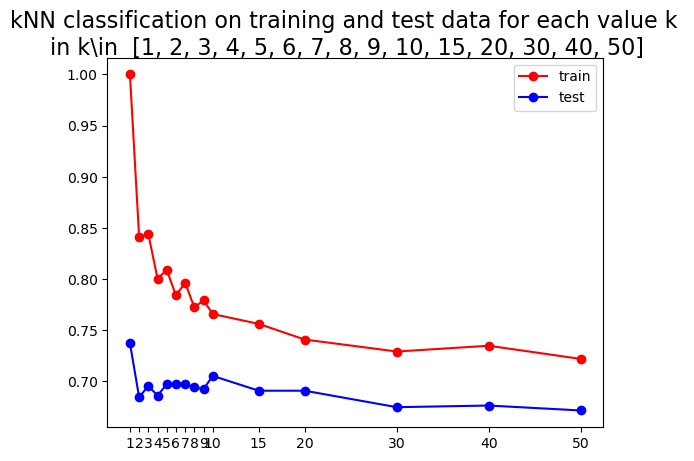

In [63]:
plt.plot(K, acc_train, 'ro-', label='train')
plt.plot(K, acc_test, 'bo-', label='test')
plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10,15,20,30,40,50])
plt.suptitle(f"kNN classification on training and test data for each value k \nin k\in  {K}", fontsize=16)

#### k=1 value look the optimum as test data shows maximum accuracy with that parameter. But maximum accuracy is still around 70%. So it is not the best classifier for this data set.

In [64]:
# Find the best model based on the test accuracy scores. Store the best k value at`best_k` and the best test accuracy in 'best_accuracy_knn'
best_k = K[acc_test.index(max(acc_test))]
best_accuracy = max(acc_test)
print("Best k value based on test accuracy scores:", best_k)
print("Best test accuracy score:", best_accuracy)

Best k value based on test accuracy scores: 1
Best test accuracy score: 0.7375201288244766


### Decision Tree Classifier

In [65]:
dt_grid = {"max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

decision_tree_grid = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=cv,
                           n_iter=20,
                           verbose=True)

decision_tree_grid.fit(X_train, y_train)
decision_tree_result = decision_tree_grid.fit(X_train, y_train)


Fitting 30 folds for each of 20 candidates, totalling 600 fits
Fitting 30 folds for each of 20 candidates, totalling 600 fits


In [66]:
decision_tree_grid.score(X_test, y_test)

0.8438003220611916

In [67]:
print("Best: %f using %s" % (decision_tree_result.best_score_, decision_tree_result.best_params_))

Best: 0.823727 using {'min_samples_split': np.int64(14), 'min_samples_leaf': np.int64(17), 'max_depth': None}


In [68]:
# Predict the test set
y_pred =decision_tree_grid.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.844


### AdaBoost Classifier

In [69]:
ada_grid = {"n_estimators": [10, 50, 100, 500],
           "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

ada_clf_grid = GridSearchCV(AdaBoostClassifier(algorithm='SAMME'), 
                            param_grid=ada_grid, 
                            cv=cv, 
                            scoring='accuracy', 
                            n_jobs=-1)

grid_result = ada_clf_grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.850466 using {'learning_rate': 1.0, 'n_estimators': 500}


In [70]:
ada_clf_grid.score(X_test, y_test)

0.8615136876006442

In [71]:
# Predict the test set
y_pred = ada_clf_grid.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.862


### Random Forest Classifier


In [72]:
## Randomized Search CV - RandomForestClassifier()
# Setup random seed
np.random.seed(42)

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [73]:
rs_rf.score(X_test, y_test)

0.8921095008051529

In [74]:
print("Best: %f using %s" % (rs_rf.best_score_, rs_rf.best_params_))

Best: 0.873832 using {'n_estimators': np.int64(510), 'min_samples_split': np.int64(14), 'min_samples_leaf': np.int64(1), 'max_depth': None}


In [75]:
# Predict the test set
y_pred = rs_rf.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.892


### Gradient Boosting Classifier

In [76]:
GBC = GradientBoostingClassifier()

params_gbc = {
    'max_depth': [2,3,4],
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'min_samples_leaf': [2,10,30]
}

grid_gbc = GridSearchCV(estimator=GBC,
                       param_grid=params_gbc,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

In [77]:
grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [15, 25, 50, 100, 200, 400]},
             scoring='accuracy')

In [78]:
print("Best: %f using %s" % (grid_gbc.best_score_, grid_gbc.best_params_))

Best: 0.887539 using {'max_depth': 4, 'min_samples_leaf': 30, 'n_estimators': 400}


In [79]:
# Extract the best estimator
best_model = grid_gbc.best_estimator_
print(best_model)

# Predict the test set
y_pred = grid_gbc.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

GradientBoostingClassifier(max_depth=4, min_samples_leaf=30, n_estimators=400)
Test set accuracy score: 0.911


### XGBoost

In [80]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
xgb.score(X_test, y_test)

0.9098228663446055

In [82]:
params_xgb = {
    'max_depth': np.arange(1, 11, 1),
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'colsample_bytree': np.arange(0.1, 1.1, 0.1)
}

In [83]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [84]:
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=params_xgb,
                           cv=cv,
                           n_iter=20,
                           verbose=True)
rs_xgb.fit(X_train, y_train)

Fitting 30 folds for each of 20 candidates, totalling 600 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          1.0],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': [15, 25, 50, 100, 200,
                                                         400]},
                   verbose=True)

In [85]:
rs_xgb.fit(X_train, y_train)
print("Best: %f using %s" % (rs_xgb.best_score_, rs_xgb.best_params_))

Fitting 30 folds for each of 20 candidates, totalling 600 fits
Best: 0.881769 using {'n_estimators': 100, 'max_depth': np.int64(8), 'learning_rate': 0.1, 'colsample_bytree': np.float64(0.9)}


In [86]:
# Predict the test set
y_pred = rs_xgb.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.915


In [87]:
model_scores_dict = {'decision_tree':decision_tree_grid.score(X_test, y_test), 'ada_boost':ada_clf_grid.score(X_test, y_test), 'random_forest': rs_rf.score(X_test, y_test), 'gradient_boosting':grid_gbc.score(X_test, y_test), 'xg_boost':rs_xgb.score(X_test, y_test)}
model_test_scores = pd.DataFrame.from_dict(model_scores_dict, orient='index', columns=['test_score'])
model_test_scores

,test_score
decision_tree,0.843800
ada_boost,0.861514
random_forest,0.892110
gradient_boosting,0.911433
xg_boost,0.914654


### Conclusion

The Gradient Boosting and XGBoost Classifier  demonstrates the best performance among Decision Tree, AdaBoost, and Random Forest, achieving an accuracy of over 0.90.
